In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CREATE DATAFRAMES

read in “Netflix Movies and TV Shows” kaggle dataset and “Netflix subscriber figures and revenue in 50 countries” table from https://www.comparitech.com/tv-streaming/netflix-subscribers/

In [2]:
media = pd.read_csv('netflix_titles.csv')
subs = pd.read_csv('netflix_subscribers.csv')
subs.rename(columns={'Country': 'country', '# of Subscribers Q1 2021': 'subscribers'}, inplace=True)

preview datasets + view dataset summaries

In [3]:
### UNCOMMENT LINE FOR DATAFRAME INFO ###

#media.info()
#media.head(5)
#subs.info()
#subs.head(5)

### JOIN

add the viewership information from the subs df to media df

In [4]:
#cut down the dataframes to just the columns i want in the join
keep = ['show_id', 'type', 'title', 'country', 'release_year', 'rating', 'duration']
subscribers = subs[['country', 'subscribers']]

#combine subscriber data (using first quarter of 2021) with media data in one dataframe
netflix = media[keep].merge(subscribers,on='country',how="inner")

create dataframe with how many of each type of media is made by country

In [5]:
#### MEDIA PER COUNTRY ####

#shows and movies made per country
by_type = netflix.groupby(by=['country', 'type']).count()
by_type = by_type.unstack()['show_id'].fillna(0)

#add in subscriber count per country
by_type = by_type.merge(subscribers,on='country',how="inner")

#rename columns to make calculations easier
by_type.rename(columns={'Movie': 'movies', 'TV Show': 'shows'}, inplace=True)

In [6]:
#test to make sure the subscriber count matches the country in netflix dataset
bool1 = (netflix[netflix['country']== 'United States'].iloc[1].subscribers == 67670924)
bool2 = (netflix[netflix['country']== 'Brazil'].iloc[1].subscribers == 17858800)
bool3 = (netflix[netflix['country']== 'Brazil'].iloc[3].subscribers == 17858800)
bool4 = (netflix[netflix['country']== 'Australia'].iloc[1].subscribers == 6169026)

#test to make sure the subscriber count matches the country in media types dataset
bool5 = (by_type[by_type['country']== 'United States'].iloc[0].subscribers == 67670924)
bool6 = (by_type[by_type['country']== 'Brazil'].iloc[0].subscribers == 17858800)
bool7 = (by_type[by_type['country']== 'Australia'].iloc[0].subscribers == 6169026)

test = [bool1, bool2, bool3, bool4, bool5, bool6, bool7]

if False in test:
    print('FAIL')
else:
    print('PASS')

PASS


### CALCULATIONS

In [7]:
### CALCULATE TOTALS ###

total_subs = subscribers['subscribers'].sum()
total_movies = by_type['movies'].sum()
total_shows = by_type['shows'].sum()
total_media = total_shows + total_movies

5929.0

In [8]:
### COMPARE EACH COUNTRY TO THE TOTAL SUBSCRIBERS & MEDIAS ###

#add column adding movies + tv shows for total amount of media made by each country
by_type['medias'] = by_type['shows'] + by_type['movies']

#column for what % of subscribers come from each country
by_type['% subs'] = ((by_type.subscribers / total_subs) * 100)

#column for what % of media come from each country
by_type['% media'] = ((by_type.medias / total_media) * 100)

#column for what % of movies come from each country
by_type['% movies'] = ((by_type.movies / total_movies) * 100)

#column for what % of shows come from each country
by_type['% shows'] = ((by_type.shows / total_shows) * 100)

### PROPORTION OF MEDIA MADE VS SUBSCRIBERS PER COUNTRY ###

#media per subscribers
by_type['%media/sub'] = ((by_type['medias'] / by_type['subscribers']) * 100)

#round percentages
by_type = by_type.round(3)

by_type

,country,movies,shows,subscribers,medias,% subs,% media,% movies,% shows,%media/sub
0,Australia,39.0,48.0,6169026,87.0,3.177,1.467,0.950,2.632,0.001
1,Austria,5.0,0.0,927420,5.0,0.478,0.084,0.122,0.000,0.001
2,Belgium,1.0,8.0,1639040,9.0,0.844,0.152,0.024,0.439,0.001
3,Brazil,50.0,27.0,17858800,77.0,9.198,1.299,1.218,1.480,0.000
4,Bulgaria,1.0,0.0,171600,1.0,0.088,0.017,0.024,0.000,0.001
5,Canada,122.0,59.0,6709076,181.0,3.455,3.053,2.972,3.235,0.003
6,Chile,11.0,3.0,927415,14.0,0.478,0.236,0.268,0.164,0.002
7,Colombia,13.0,22.0,2677007,35.0,1.379,0.590,0.317,1.206,0.001
8,Croatia,0.0,1.0,114950,1.0,0.059,0.017,0.000,0.055,0.001
9,Cyprus,0.0,1.0,49200,1.0,0.025,0.017,0.000,0.055,0.002


In [9]:
### TOP COUNTRIES FOR EACH CATEGORY ###

#dict of countries that have the most subscribers, list of top 5 countries
top_subs = dict(by_type.set_index('country').sort_values(by=['subscribers'], ascending=False)['subscribers'])
top_5_subs = list(top_subs.keys())[:5]

#dict of countries that have made the most movies, list of top 5 countries
top_movies = dict(by_type.set_index('country').sort_values(by=['movies'], ascending=False)['movies'])
top_5_movies = list(top_movies.keys())[:5]

#dict of countries that have made the most shows, list of top 5 countries
top_shows = dict(by_type.set_index('country').sort_values(by=['shows'], ascending=False)['shows'])
top_5_shows = list(top_shows.keys())[:5]

#calculate how many subscribers from top producing countries
top_producers = np.unique(top_5_shows + top_5_movies)
top_producer_subs = by_type[by_type['country'].isin(top_producers)]['subscribers'].sum()
other_subs = total_subs - top_producer_subs
top_prod_subs_perc = ((top_producer_subs/total_subs) * 100).round(3)

#calculate how much media from top producing countries
top_producer_media = by_type[by_type['country'].isin(top_producers)]['shows'].sum() + by_type[by_type['country'].isin(top_producers)]['movies'].sum()
top_contrib_perc = ((top_producer_media/total_media) * 100).round(3)

#list of countries with highest proportion of media made per subscriber 
#aka contribute significantly more media than they consume
per_sub = dict(by_type.set_index('country').sort_values(by=['%media/sub'], ascending=False)['%media/sub'])
top_givers = list(per_sub.keys())[:5]
top_takers = list(per_sub.keys())[-5:]
top_takers.reverse()

#print summary
print(f'top 5 countries with the most subscribers: {top_5_subs}')
print(f'top 5 movie makers: {top_5_movies}')
print(f'top 5 tv show makers: {top_5_shows}')
print(f'top 5 countries with highest proportion of media to subscriber: {top_givers}')
print(f'top 5 countries with highest proportion of subscriber to media: {top_takers}')
print(f'While the top media producing countries contribute {top_contrib_perc}% of the media on netflix, only {top_prod_subs_perc}% of netflix subscribers come from these countries')


top 5 countries with the most subscribers: ['United States', 'Brazil', 'United Kingdom', 'Germany', 'France']
top 5 movie makers: ['United States', 'India', 'United Kingdom', 'Canada', 'Spain']
top 5 tv show makers: ['United States', 'United Kingdom', 'Japan', 'South Korea', 'India']
top 5 countries with highest proportion of media to subscriber: ['India', 'South Africa', 'Indonesia', 'Russia', 'Japan']
top 5 countries with highest proportion of subscriber to media: ['Brazil', 'Switzerland', 'Australia', 'France', 'Italy']
While the top media producing countries contribute 83.977% of the media on netflix, only 54.441% of netflix subscribers come from these countries


#### <b>NOTES:</b> 

While India is in both the top 5 movie and show makers and Japan and South Korea are in the top tv show makers, the countries with the most subscribers do not include any asian countries. 

USA in top 10 "givers" because Netflix is an American company and produces most content here. Other "giver" countries is due to other reasons (ex: India has Bollywood producing media but high poverty rates, meaning huge swaths of the population wouldn't be able to afford netflix in the first place).

### VISUALIZATIONS

> pie chart for subscribers per country with. top 5 highest subscriber count labelled

In [10]:
#pie chart for how many subscribers come from top 5 media producing countries

#sort by number of subscribers
by_type = by_type.sort_values(by=['subscribers'], ascending=False)

#dataframe for only top five countries
top_five_subs = by_type[:5].copy()

#combine leftover # of subscribers
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'subscribers' : [(total_subs - top_five_subs['subscribers'].sum())]
})

#combining top 5 with others
combined_top_subs = pd.concat([top_five_subs, new_row])[['country', 'subscribers']]

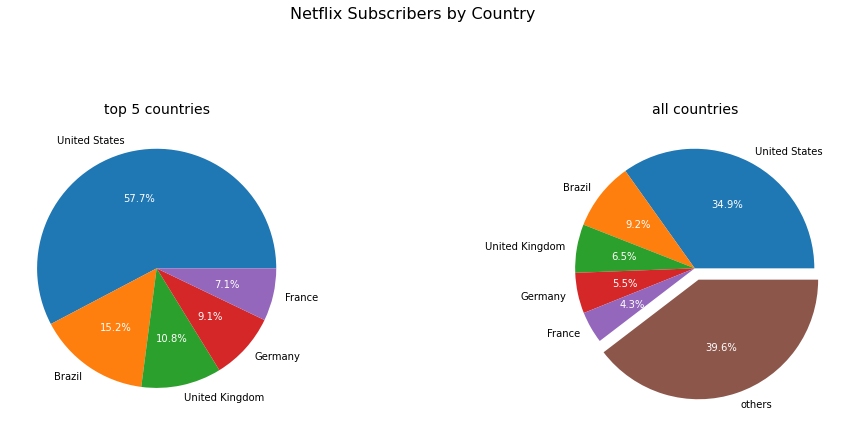

In [13]:
#plotting for comparison

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
plt.subplots_adjust(wspace = 0.8, top=1.35)

fig.suptitle('Netflix Subscribers by Country', fontsize=16)

labels = top_five_subs['country']
values = top_five_subs['subscribers']
_, _, pcts = ax1.pie(values,labels = labels, autopct='%1.1f%%') #plot first pie
ax1.set_title('top 5 countries', fontsize=14)

#make percentage color white
for pct in pcts:
    pct.set_color('white')


labels = list(combined_top_subs['country'])
values = combined_top_subs['subscribers']
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1)  # make others stand out
_, _, pcts = ax2.pie(values,labels = labels, explode = explode, autopct='%1.1f%%') #plot second pie
ax2.set_title('all countries', fontsize=14)

#make percentage color white
for pct in pcts:
    pct.set_color('white')

plt.show()

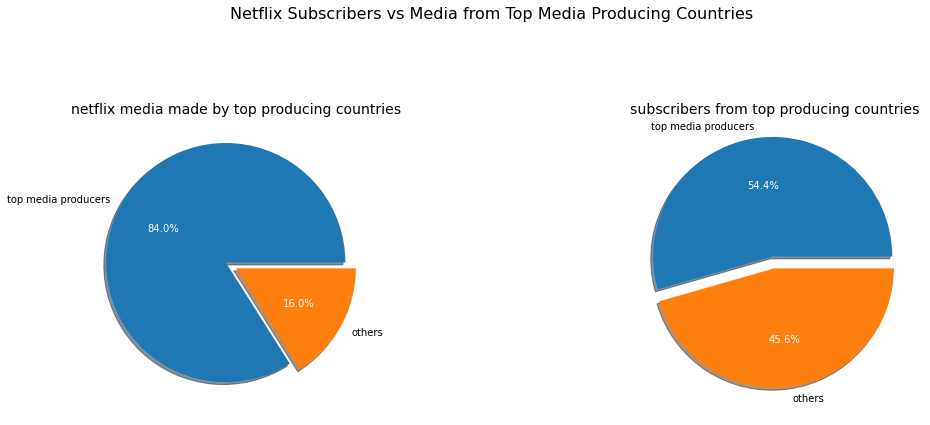

In [12]:
#pie chart for how many subscribers come from top 5 media producing countries 
#vs which countries have the most subscribers
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
plt.subplots_adjust(wspace = 0.8, top=1.35)

fig.suptitle('Netflix Subscribers vs Media from Top Media Producing Countries', fontsize=16)

#% media pie chart
labels = ['top media producers', 'others']
values = [top_contrib_perc, (100 - top_contrib_perc)]

#make main part bigger
explode = (0.1, 0.0)

_, _, pcts = ax1.pie(values,labels = labels, explode=explode, shadow=True, autopct='%1.1f%%') #plot first pie
ax1.set_title('netflix media made by top producing countries', fontsize=14)

#make percentage color white
for pct in pcts:
    pct.set_color('white')


#% subscriber pie chart
values = [top_prod_subs_perc, (100 - top_prod_subs_perc)]
_, _, pcts = ax2.pie(values,labels = labels, explode=explode, shadow=True, autopct='%1.1f%%') #plot second pie
ax2.set_title('subscribers from top producing countries', fontsize=14)

#make percentage color white
for pct in pcts:
    pct.set_color('white')

plt.show()

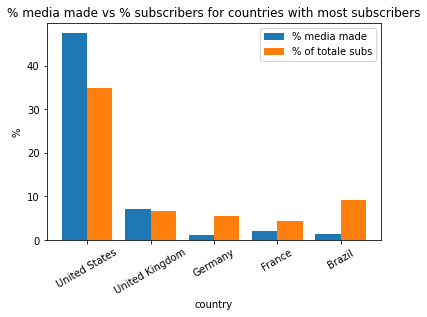

In [15]:
#bar chart for the top 5 countries w/ most subscribers side by side comparison of media made vs subscribers

top_subs_df = by_type[by_type['country'].isin(top_5_subs)]
top_subs_df = top_subs_df.sort_values(by = '%media/sub', ascending = False)

x = top_subs_df['country']
y1 = top_subs_df['% media']
y2 = top_subs_df['% subs']

x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, y1, 0.4, label = '% media made')
plt.bar(x_axis + 0.2, y2, 0.4, label = '% of totale subs')
  
plt.xticks(x_axis, x, rotation=30)
plt.xlabel("country")
plt.ylabel("%")
plt.title("% media made vs % subscribers for countries with most subscribers")
plt.legend()

plt.show()

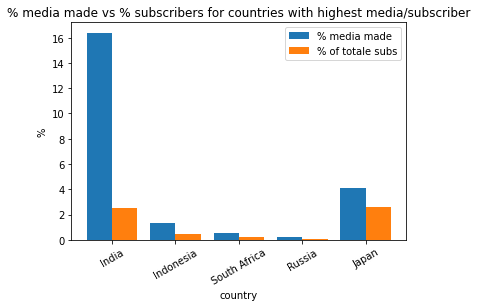

In [17]:
#bar chart for the 5 countries w/ most contributions. side by side comparison of media made vs subscribers

top_subs_df = by_type[by_type['country'].isin(top_givers)]
top_subs_df = top_subs_df.sort_values(by = '%media/sub', ascending = False)

x = top_subs_df['country']
y1 = top_subs_df['% media']
y2 = top_subs_df['% subs']

x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, y1, 0.4, label = '% media made')
plt.bar(x_axis + 0.2, y2, 0.4, label = '% of totale subs')
  
plt.xticks(x_axis, x, rotation=30)
plt.xlabel("country")
plt.ylabel("%")
plt.title("% media made vs % subscribers for countries with highest media/subscriber")
plt.legend()

plt.show()

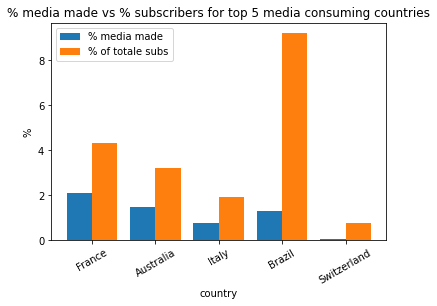

In [15]:
#bar chart for the 5 countries w/ most subscribers/media. side by side comparison of media made vs subscribers

top_subs_df = by_type[by_type['country'].isin(top_takers)]
top_subs_df = top_subs_df.sort_values(by = '%media/sub', ascending = False)

x = top_subs_df['country']
y1 = top_subs_df['% media']
y2 = top_subs_df['% subs']

x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, y1, 0.4, label = '% media made')
plt.bar(x_axis + 0.2, y2, 0.4, label = '% of totale subs')
  
plt.xticks(x_axis, x, rotation=30)
plt.xlabel("country")
plt.ylabel("%")
plt.title("% media made vs % subscribers for top 5 media consuming countries")
plt.legend()

plt.show()

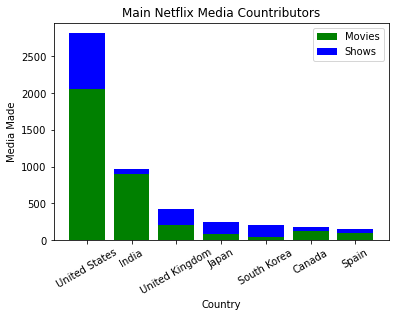

In [16]:
#bar chart with vertically stacked bars to compare tv shows vs movies made per country

# create data
top_makers = np.unique(top_5_movies + top_5_shows)
top_makers_df = by_type[by_type['country'].isin(top_makers)]
top_makers_df = top_makers_df.sort_values(by = 'medias', ascending = False)

x = top_makers_df.country
y1 = top_makers_df.movies
y2 = top_makers_df.shows
  
# plot bars in stack
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='b')

plt.xticks(rotation = 30)
plt.xlabel("Country")
plt.ylabel("Media Made")
plt.legend(["Movies", "Shows"])
plt.title("Main Netflix Media Countributors")

plt.show()